# Map

First let us define a map of cities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clases.ACO import *

def show_cities(path, w=12, h=8):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    if isinstance(path, dict):      path = list(path.values())
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]    
    plt.imshow(united_states_map)    
    for x0, y0 in path:
        plt.plot(x0, y0, 'y*', markersize=15)     
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])
    
def polyfit_plot(x,y,deg, **kwargs):
    coefficients = np.polyfit(x,y,deg,**kwargs)
    poly  = np.poly1d(coefficients)
    new_x = np.linspace(x[0], x[-1])
    new_y = poly(new_x)
    plt.plot(x, y, "o", new_x, new_y)
    plt.xlim([x[0]-1, x[-1] + 1 ])
    
    terms = []
    for p, c in enumerate(reversed(coefficients)):
        term = str(round(c,1))
        if p == 1: term += 'x'
        if p >= 2: term += 'x^'+str(p)
        terms.append(term)        
    plt.title(" + ".join(reversed(terms)))    

30


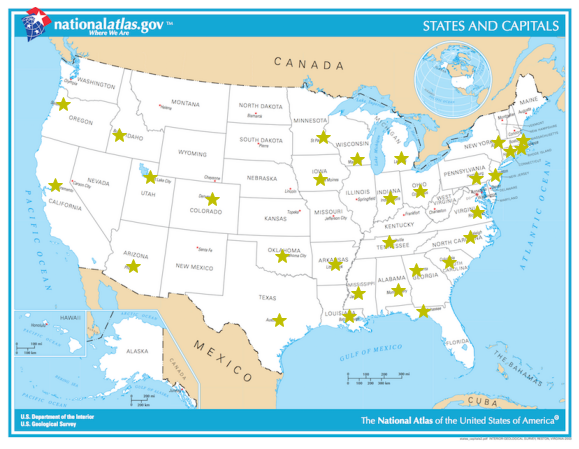

In [2]:
cities = { 
    "Oklahoma City": (392.8, 356.4), 
    "Montgomery": (559.6, 404.8), 
    "Saint Paul": (451.6, 186.0), 
    "Trenton": (698.8, 239.6), 
    "Salt Lake City": (204.0, 243.2), 
    "Columbus": (590.8, 263.2), 
    "Austin": (389.2, 448.4), 
    "Phoenix": (179.6, 371.2), 
    "Hartford": (719.6, 205.2), 
    "Baton Rouge": (489.6, 442.0), 
    "Salem": (80.0, 139.2), 
    "Little Rock": (469.2, 367.2), 
    "Richmond": (673.2, 293.6), 
    "Jackson": (501.6, 409.6), 
    "Des Moines": (447.6, 246.0), 
    "Lansing": (563.6, 216.4), 
    "Denver": (293.6, 274.0), 
    "Boise": (159.6, 182.8), 
    "Raleigh": (662.0, 328.8), 
    "Atlanta": (585.6, 376.8), 
    "Madison": (500.8, 217.6), 
    "Indianapolis": (548.0, 272.8), 
    "Nashville": (546.4, 336.8), 
    "Columbia": (632.4, 364.8), 
    "Providence": (735.2, 201.2), 
    "Boston": (738.4, 190.8), 
    "Tallahassee": (594.8, 434.8), 
    "Sacramento": (68.4, 254.0), 
    "Albany": (702.0, 193.6), 
    "Harrisburg": (670.8, 244.0) 
}
cities = list(sorted(cities.items()))
print(len(cities))
show_cities(cities)

7074

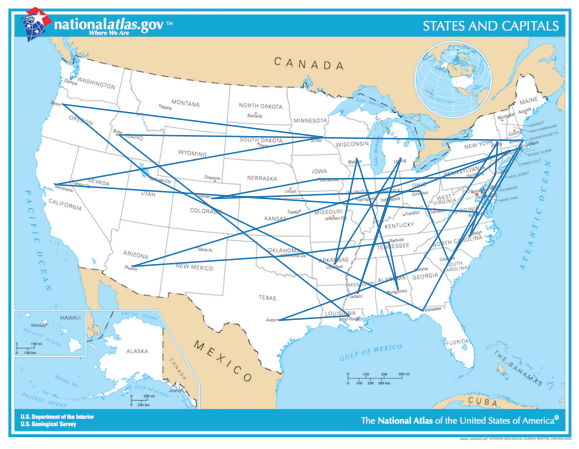

In [3]:
show_path(cities)
path_distance(cities)

{'path_cost': 4655, 'ants_used': 1, 'epoch': 4021, 'round_trips': 1, 'clock': 0}
{'path_cost': 4498, 'ants_used': 2, 'epoch': 4250, 'round_trips': 1, 'clock': 0}
{'path_cost': 3610, 'ants_used': 66, 'epoch': 8556, 'round_trips': 2, 'clock': 0}
{'path_cost': 3521, 'ants_used': 129, 'epoch': 11694, 'round_trips': 3, 'clock': 0}
{'path_cost': 3066, 'ants_used': 132, 'epoch': 12336, 'round_trips': 3, 'clock': 0}
{'path_cost': 2728, 'ants_used': 213, 'epoch': 16410, 'round_trips': 4, 'clock': 0}
{'path_cost': 2720, 'ants_used': 277, 'epoch': 19746, 'round_trips': 5, 'clock': 0}
{'path_cost': 2625, 'ants_used': 312, 'epoch': 20969, 'round_trips': 6, 'clock': 0}
{'path_cost': 2574, 'ants_used': 348, 'epoch': 22673, 'round_trips': 6, 'clock': 0}
{'path_cost': 2481, 'ants_used': 365, 'epoch': 23136, 'round_trips': 6, 'clock': 0}
{'path_cost': 2473, 'ants_used': 380, 'epoch': 23870, 'round_trips': 7, 'clock': 0}
{'path_cost': 2464, 'ants_used': 390, 'epoch': 24708, 'round_trips': 7, 'clock': 0}


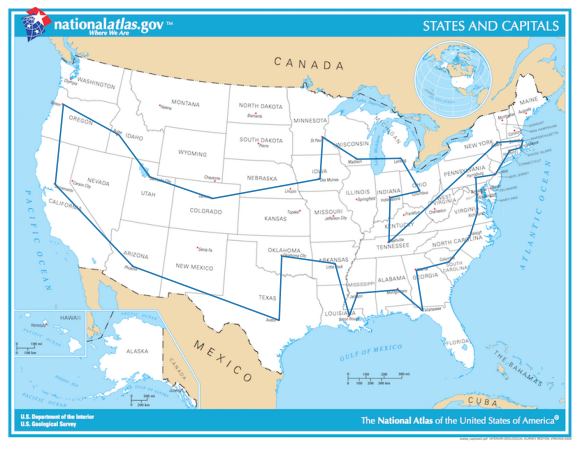

In [4]:
results = AntColonyRunner(cities, distance_power=1, verbose=True, plot=True)

# pheromone_power
This affects the power to which relative differences in pheromones are noticed. 

- Negative numbers make the pheromones repulsive, yet the algorithm still finds (slightly) better than random results
- The pheromone_power effect is most noticable when the distance heuristic is disabled.
- When run without a timer, increasing a tiny bit above 1 resulted in a massive path_length improvement with a significantly extended runtime. 
    - The sweet spot seems to be around `1.25` (setting this to default)
    - This shows an amplified sensitivity to pheromones and that the ants could continually find new paths
    - This also seems to amplify the effect of other smell heuristic settings[[](http://)](http://)
- Setting `pheromone_power` destroys the fine balance between optimization and exploration

In [7]:
for distance_power in [0,1,2]:
    for pheromone_power in [-2.0, -1.0, 0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 3.0, 5.0, 10.0]:
        result = AntColonyRunner(cities, distance_power=distance_power, pheromone_power=pheromone_power, time=0)
    print()

N=30  |  7074 -> 5591 |    2s | ants:  1315 | trips:   22 | distance_power=0 pheromone_power=-2.0 time=0
N=30  |  7074 -> 5583 |    2s | ants:  1392 | trips:   23 | distance_power=0 pheromone_power=-1.0 time=0
N=30  |  7074 -> 5490 |    1s | ants:   555 | trips:   10 | distance_power=0 pheromone_power=0.0 time=0
N=30  |  7074 -> 5688 |    1s | ants:   864 | trips:   14 | distance_power=0 pheromone_power=0.5 time=0
N=30  |  7074 -> 2980 |   10s | ants:  9870 | trips:  156 | distance_power=0 pheromone_power=1.0 time=0
N=30  |  7074 -> 3582 |    8s | ants:  7948 | trips:  126 | distance_power=0 pheromone_power=1.25 time=0
N=30  |  7074 -> 3915 |    4s | ants:  3432 | trips:   55 | distance_power=0 pheromone_power=1.5 time=0
N=30  |  7074 -> 4284 |    1s | ants:  1281 | trips:   21 | distance_power=0 pheromone_power=1.75 time=0
N=30  |  7074 -> 4277 |    2s | ants:  1489 | trips:   24 | distance_power=0 pheromone_power=2.0 time=0
N=30  |  7074 -> 4414 |    1s | ants:   681 | trips:   11 | 

In [17]:
for distance_power in [0,1,2]:
    for pheromone_power in [1.0, 1.1, 1.2, 1.3, 1.4]:
        result = AntColonyRunner(cities, distance_power=distance_power, pheromone_power=pheromone_power, time=0)
    print()

N=30  |  7074 -> 5608 |    1s | ants:   572 | trips:   10 | distance_power=0 pheromone_power=1.0 time=0
N=30  |  7074 -> 3418 |   10s | ants:  5369 | trips:   86 | distance_power=0 pheromone_power=1.1 time=0
N=30  |  7074 -> 3766 |   10s | ants:  5222 | trips:   83 | distance_power=0 pheromone_power=1.2 time=0
N=30  |  7074 -> 5696 |    1s | ants:   570 | trips:   10 | distance_power=0 pheromone_power=1.3 time=0
N=30  |  7074 -> 5078 |    1s | ants:   562 | trips:   10 | distance_power=0 pheromone_power=1.4 time=0

N=30  |  7074 -> 2434 |    4s | ants:  3005 | trips:   48 | distance_power=1 pheromone_power=1.0 time=0
N=30  |  7074 -> 2318 |   11s | ants:  7784 | trips:  124 | distance_power=1 pheromone_power=1.1 time=0
N=30  |  7074 -> 2315 |    2s | ants:  1625 | trips:   26 | distance_power=1 pheromone_power=1.2 time=0
N=30  |  7074 -> 2403 |    5s | ants:  3028 | trips:   48 | distance_power=1 pheromone_power=1.3 time=0
N=30  |  7074 -> 2233 |    2s | ants:  1270 | trips:   21 | dis